<a href="https://colab.research.google.com/github/Nonna-nna/Nonna-nna/blob/Linear-guide/%E4%BF%9D%E6%8C%81%E5%99%A8_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#目標：完全一致の座標を特定

ターゲットが元、テンプレートが探したい対象

min_v, max_v, min_l, max_l =  -0.08215800672769547 0.8096993565559387 (19, 4) (2, 21)


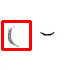

In [2]:
import cv2
from google.colab.patches import cv2_imshow

# ターゲット画像
target = cv2.imread('/content/〇の画像_4.jpg')
# テンプレート画像
temp = cv2.imread('/content/〇の画像_03.jpg')
# テンプレートマッチを実行
r = cv2.matchTemplate(target, temp, cv2.TM_CCOEFF_NORMED)
#結果から検出領域の位置を取得
min_v, max_v, min_l, max_l = cv2.minMaxLoc(r)
#左上の座標
top_l = max_l
print('min_v, max_v, min_l, max_l = ', min_v, max_v, min_l, max_l)
bottom_r = (top_l[0] + temp.shape[1], top_l[1] + temp.shape[0])
# 検出領域を四角で描画
cv2.rectangle(target, top_l, bottom_r, (0, 0, 255), 2)
cv2_imshow(target)

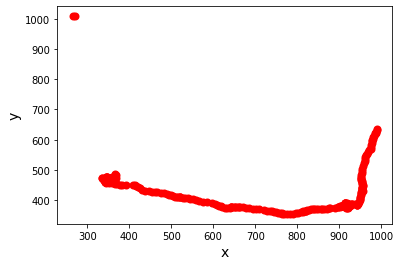

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#動画ファイルの読み込み
movie = cv2.VideoCapture('/content/drive/MyDrive/trim_01.mp4')
#フレーム数の取得
nframe = int(movie.get(cv2.CAP_PROP_FRAME_COUNT))

#左上座標の検出
coordinate=[]
for i in range(nframe):
    #ret, frame = movie.read()
    # ターゲット画像
    #target = cv2.imread('/content/〇の画像_4.jpg')
    ret, target = movie.read()
    # テンプレート画像
    temp = cv2.imread('/content/消しゴムの一部３.PNG')
    # テンプレートマッチを実行
    r = cv2.matchTemplate(target, temp, cv2.TM_CCOEFF_NORMED)
    #結果から検出領域の位置を取得
    min_v, max_v, min_l, max_l = cv2.minMaxLoc(r)
    #左上の座標
    top_l = max_l
    coordinate.append(top_l)
    '''
    #print('min_v, max_v, min_l, max_l = ', min_v, max_v, min_l, max_l)
    bottom_r = (top_l[0] + temp.shape[1], top_l[1] + temp.shape[0])
    # 検出領域を四角で描画
    cv2.rectangle(target, top_l, bottom_r, (0, 0, 255), 2)
    cv2_imshow(target)
    '''
coordinate=np.array(coordinate)

#重心履歴の可視化
plt.scatter(coordinate[:,0], coordinate[:,1], color='red', linestyle='solid', linewidth = 2.0, label='moment')
plt.xlabel('x',color='black',fontsize=14)
plt.ylabel('y',color='black',fontsize=14)
plt.savefig('moment.jpg', dpi=300)

openCV-9.4章　動画の顔検出より
(detect_object_camera.py)

In [ ]:
# -*- coding: utf-8 -*

import cv2

try:
    capture = cv2.VideoCapture(0)    
    cascade = cv2.CascadeClassifier(
            r'C:\Users\prode\Downloads\haarcascade_frontalface_alt.xml')
    
    while(True):
        ret, frame = capture.read()
        if ret == False:
            print('カメラから映像を取得できませんでした.')
            break
        facerect = cascade.detectMultiScale(frame)
        if len(facerect) > 0:
            for rect in facerect:
                cv2.rectangle(frame, tuple(rect[0:2]),
                              tuple(rect[0:2]+rect[2:4]), (0, 0,255), thickness=2)
        cv2.imshow('f', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    capture.release()
    cv2.destroyAllWindows()
except:
    import sys
    print("Error:", sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))